In [1]:
# KNN Classification
import pandas as pd
from pandas import read_csv
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

In [3]:
glass=pd.read_csv('glass.csv')
glass

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [4]:
glass.shape

(214, 10)

In [5]:
glass.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [7]:
glass.columns

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'], dtype='object')

In [8]:
glass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [10]:
glass.duplicated().sum()

1

In [12]:
glass.drop_duplicates(inplace=True)

In [14]:
glass.duplicated().sum()

0

In [11]:
glass.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [15]:
glass.corr()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
RI,1.000000,-0.198802,-0.127526,-0.400973,-0.539000,-0.287645,0.811183,0.001679,0.147083,-0.160140
Na,-0.198802,1.000000,-0.278420,0.167735,-0.064885,-0.264158,-0.278194,0.329080,-0.239374,0.508837
Mg,-0.127526,-0.278420,1.000000,-0.479575,-0.162437,0.007617,-0.446197,-0.491818,0.085426,-0.744195
Al,-0.400973,0.167735,-0.479575,1.000000,-0.016195,0.323683,-0.258068,0.480642,-0.080583,0.597432
Si,-0.539000,-0.064885,-0.162437,-0.016195,1.000000,-0.197281,-0.207145,-0.104389,-0.097717,0.147725
K,-0.287645,-0.264158,0.007617,0.323683,-0.197281,1.000000,-0.317032,-0.043653,-0.009372,-0.012455
Ca,0.811183,-0.278194,-0.446197,-0.258068,-0.207145,-0.317032,1.000000,-0.112208,0.126314,0.002677
Ba,0.001679,0.329080,-0.491818,0.480642,-0.104389,-0.043653,-0.112208,1.000000,-0.059729,0.574896
Fe,0.147083,-0.239374,0.085426,-0.080583,-0.097717,-0.009372,0.126314,-0.059729,1.000000,-0.191090
Type,-0.160140,0.508837,-0.744195,0.597432,0.147725,-0.012455,0.002677,0.574896,-0.191090,1.000000


<AxesSubplot:>

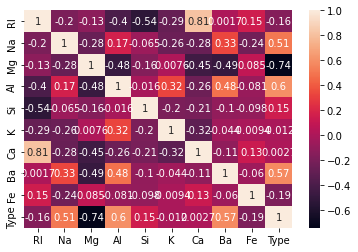

In [17]:
import seaborn as sns
sns.heatmap(glass.corr(),annot=True)

In [18]:
features = ['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']

<AxesSubplot:xlabel='Type', ylabel='count'>

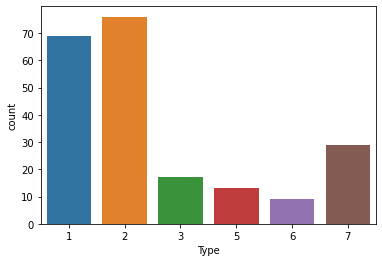

In [20]:
#Visualzing Type Variable
import warnings
warnings.filterwarnings('ignore')
sns.countplot(glass['Type'])

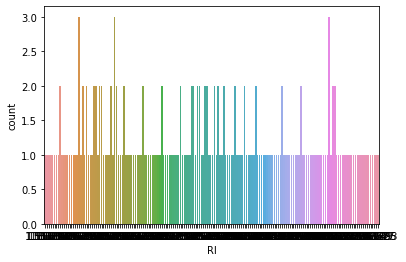

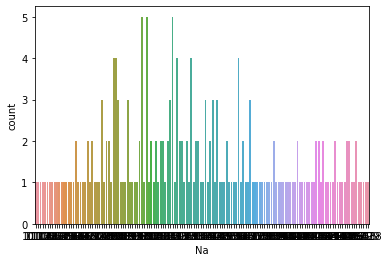

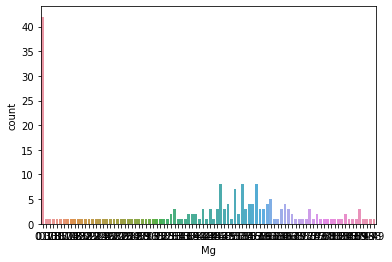

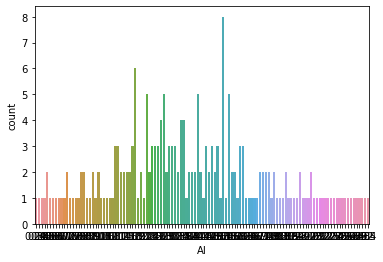

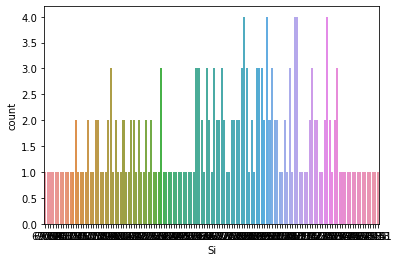

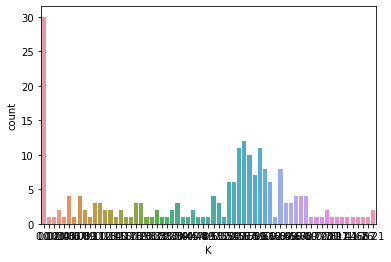

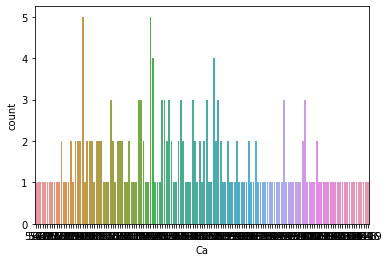

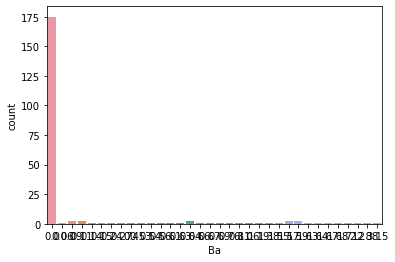

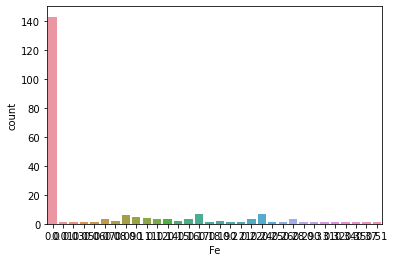

In [22]:
#Multiple Hist plot
import seaborn as sns
import matplotlib.pyplot as plt
for feature in features:
    sns.countplot(glass[feature])
    plt.show()

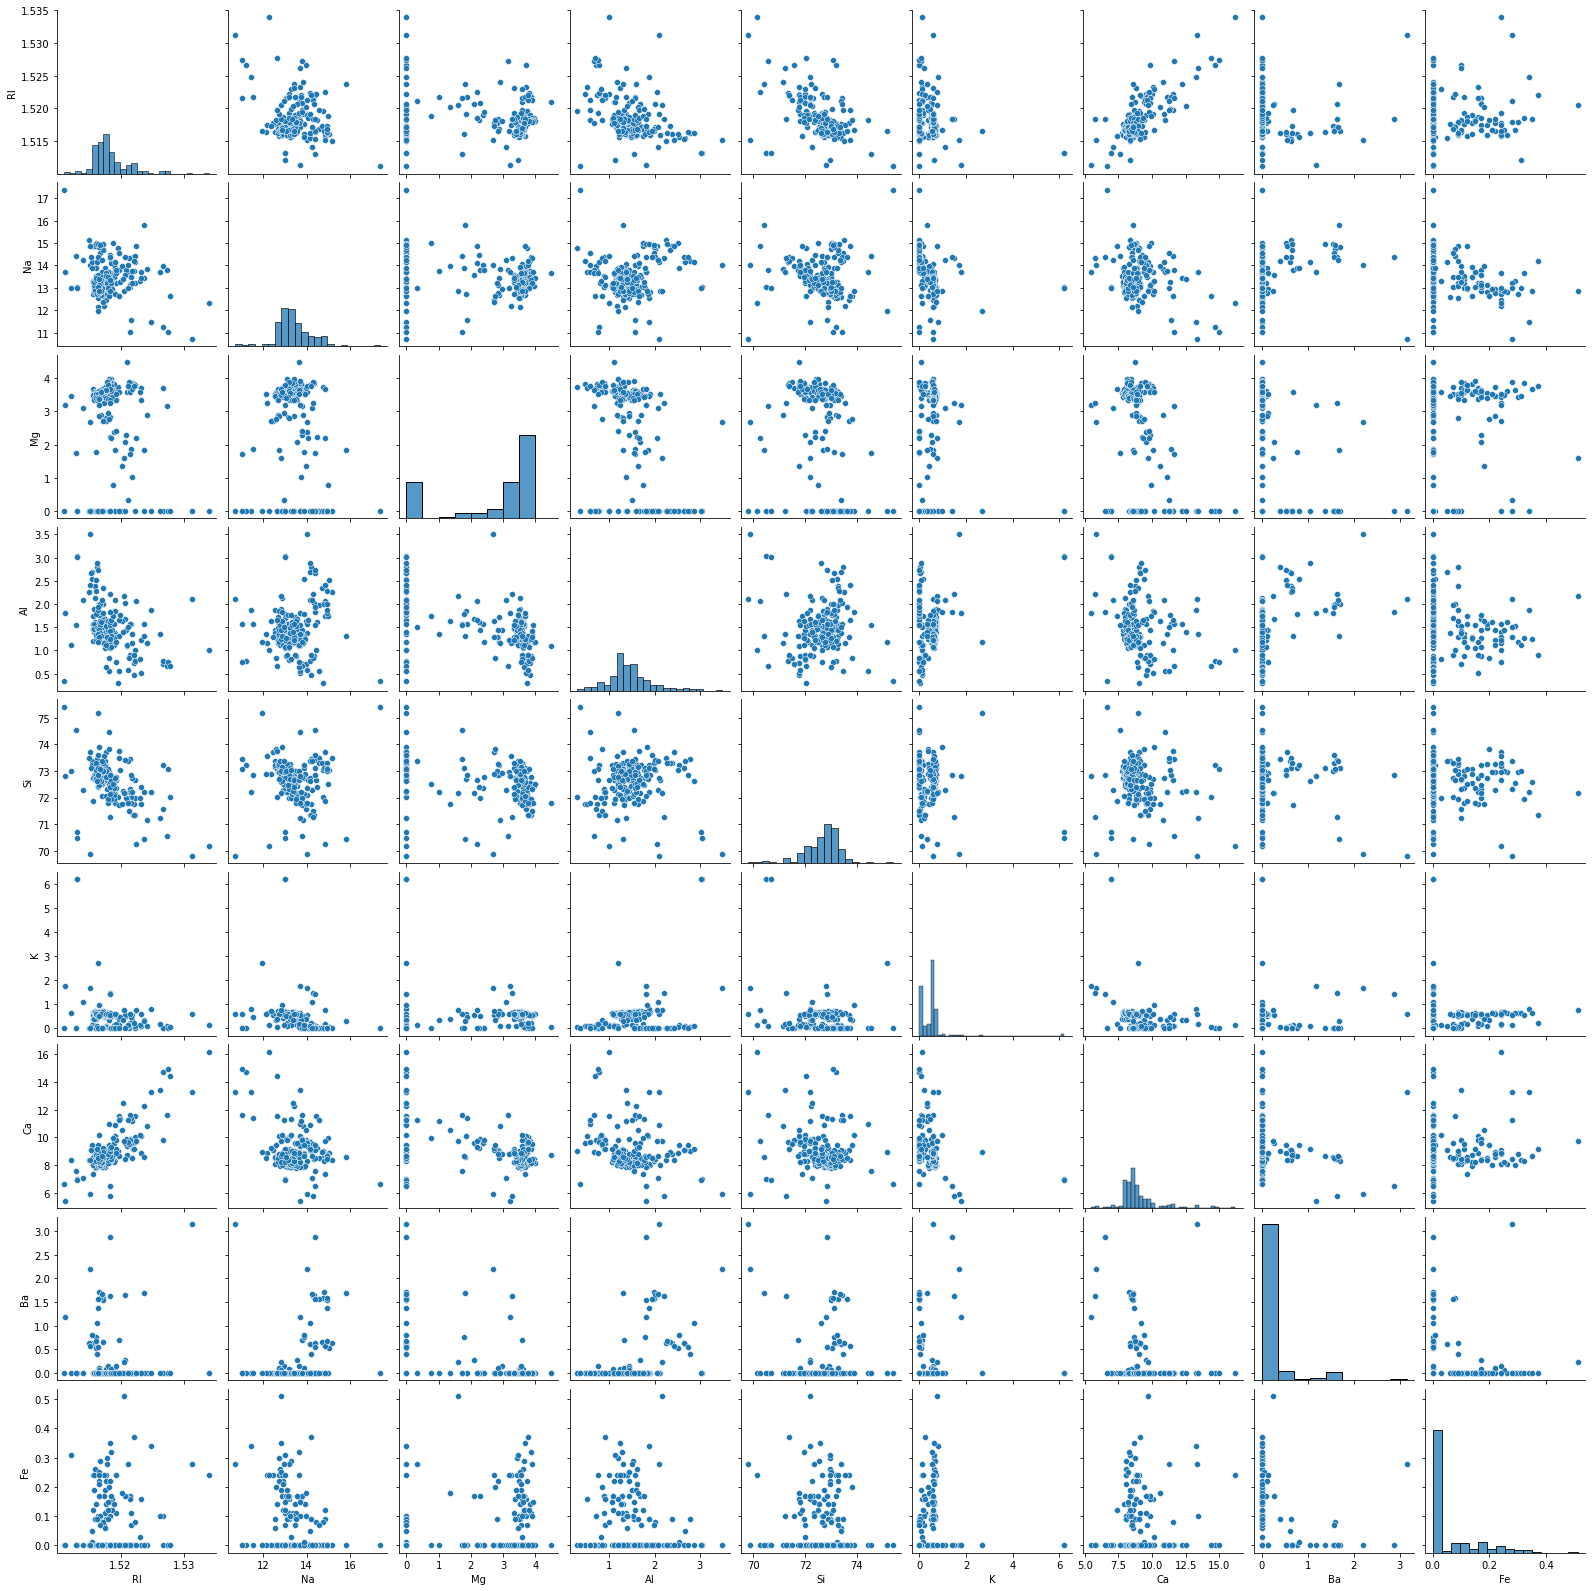

In [23]:
sns.pairplot(glass[features])

In [29]:
# lets split the into the input and target variable
X= glass.iloc[:, 0:-1]
y= glass.iloc[:, -1]

In [34]:
#Testing data in to training and testing 
from sklearn.model_selection import train_test_split,GridSearchCV
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10)

In [35]:
neigh=np.array(range(1,30))
param_grid=dict(n_neighbors=neigh)

In [36]:
# Creating the model
import warnings
warnings.filterwarnings('ignore')
model=KNeighborsClassifier()
grid=GridSearchCV(estimator=model,param_grid=param_grid)
grid.fit(x_train,y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])})

In [37]:
# predicting the values
y_pred=grid.predict(x_test)
y_pred

array([7, 7, 1, 2, 2, 1, 1, 1, 1, 1, 1, 7, 1, 2, 5, 5, 3, 1, 1, 2, 1, 1,
       2, 1, 2, 1, 2, 3, 2, 3, 1, 3, 2, 1, 6, 1, 1, 1, 2, 6, 1, 1, 1],
      dtype=int64)

In [38]:
# calculating accuracy
np.mean(y_pred==y_test)

0.9767441860465116

In [39]:
y_pred1=grid.predict(x_train)
y_pred1

array([2, 5, 2, 2, 2, 2, 1, 7, 2, 2, 1, 2, 5, 7, 3, 2, 2, 6, 2, 5, 7, 2,
       7, 5, 7, 2, 2, 1, 3, 1, 3, 2, 2, 7, 5, 3, 5, 2, 1, 1, 1, 1, 7, 2,
       5, 7, 2, 2, 7, 7, 2, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 1, 1, 2,
       2, 7, 1, 1, 1, 7, 7, 1, 7, 6, 7, 1, 6, 2, 7, 5, 2, 1, 2, 5, 2, 7,
       1, 2, 1, 2, 2, 2, 6, 2, 1, 2, 1, 2, 3, 3, 1, 2, 1, 2, 7, 1, 2, 3,
       5, 7, 2, 2, 5, 7, 2, 2, 7, 7, 2, 3, 3, 7, 2, 1, 1, 1, 1, 1, 1, 2,
       2, 3, 1, 2, 2, 2, 2, 3, 1, 2, 7, 6, 6, 7, 1, 1, 2, 2, 2, 1, 2, 2,
       1, 2, 5, 1, 1, 2, 1, 7, 3, 3, 2, 2, 1, 1, 2, 1], dtype=int64)

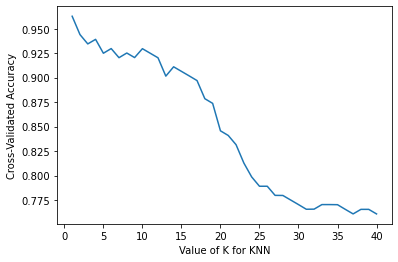

In [41]:
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
k_range = range(1, 41)
k_scores = []
# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x, y, cv=5)
    k_scores.append(scores.mean())
# plot to see clearly
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()